# 국내 프랜차이즈 현황 분석리포트 (2018~2020)

통계청,「프랜차이즈조사」, 2020, 2022.11.20, 프랜차이즈 통계(가맹점) 

https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_FR0001&conn_path=I2

### 0. 데이터 불러오기, 간단한 정보

In [ ]:
df_franchise = pd.read_csv('https://raw.githubusercontent.com/tngus4334/KOSIS/main/%ED%94%84%EB%9E%9C%EC%B0%A8%EC%9D%B4%EC%A6%88_%ED%86%B5%EA%B3%84_%EA%B0%80%EB%A7%B9%EC%A0%90__20221120160440.csv',
                 encoding='cp949')

In [ ]:
df_franchise.head()

,시도별,주요 업종별,시점,사업체수 (개),종사자수 (명),매출액 (백만원),영업비용 (백만원),매출원가 (백만원),인건비 (백만원),임차료 (백만원),기타영업비용 (백만원),연간급여액 (백만원)
0,서울특별시,체인화 편의점,2018,8102,39594,4655165,4519097,-,373310,196036,3949751,311093
1,서울특별시,체인화 편의점,2019,7756,38372,4586809,4447588,3167903,393400,236924,649362,371494
2,서울특별시,체인화 편의점,2020,8339,37870,4529143,4492911,3162613,392549,214376,723373,375779
3,서울특별시,문구용품 및 회화용품 소매업,2018,359,1017,162145,144894,-,13808,14938,116148,11892
4,서울특별시,문구용품 및 회화용품 소매업,2019,362,1000,132643,123303,85608,13828,12090,11777,13098


In [ ]:
df_franchise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   시도별           816 non-null    object
 1   주요 업종별        816 non-null    object
 2   시점            816 non-null    int64 
 3   사업체수 (개)      816 non-null    int64 
 4   종사자수 (명)      816 non-null    int64 
 5   매출액 (백만원)     816 non-null    int64 
 6   영업비용 (백만원)    816 non-null    int64 
 7   매출원가 (백만원)    816 non-null    object
 8   인건비 (백만원)     816 non-null    int64 
 9   임차료 (백만원)     816 non-null    int64 
 10  기타영업비용 (백만원)  816 non-null    int64 
 11  연간급여액 (백만원)   816 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 76.6+ KB


In [ ]:
# 시점을 object 형식으로 변환
df_franchise['시점'] = df_franchise['시점'].astype(str)

In [ ]:
print(df_franchise.shape)
df_franchise.describe()

(816, 12)


,사업체수 (개),종사자수 (명),매출액 (백만원),영업비용 (백만원),인건비 (백만원),임차료 (백만원),기타영업비용 (백만원),연간급여액 (백만원)
count,816.00,816.00,816.00,816.00,816.00,816.00,816.00,816.00
mean,809.02,3021.65,266102.73,244856.13,34085.13,18045.02,88356.03,31675.02
std,1313.13,5589.47,573977.82,548892.37,62988.47,36273.42,266037.97,59537.20
min,16.00,39.00,1991.00,1857.00,130.00,223.00,230.00,119.00
25%,144.75,447.50,44334.25,38996.75,6266.75,2731.75,8302.00,5778.00
50%,397.00,1353.00,108895.00,96661.00,14342.50,6586.50,24339.50,13137.00
75%,928.75,2940.50,234000.50,210460.75,34499.50,15137.75,76506.50,31302.25
max,12280.00,56528.00,6947792.00,6767837.00,544871.00,289258.00,4717516.00,521488.00


### 1. 어느지역의 평균인건비가 가장 높을까?

- 평균인건비는 서울이 가장 높을것이라고 예상했다.

In [ ]:
df_franchise_region_labor = df_franchise.groupby('시도별')[['인건비 (백만원)']].mean()
df_franchise_region_labor = df_franchise_region_labor.sort_values(['인건비 (백만원)'],ascending=False)

In [ ]:
df_franchise_region_labor

,인건비 (백만원)
시도별,
경기도,159742.19
서울특별시,138076.60
부산광역시,35000.27
인천광역시,34543.04
경상남도,28979.44
충청남도,22609.94
대구광역시,21757.10
경상북도,20254.06
강원도,16832.62


- 그러나 경기도의 평균인건비가 가장 높았으며 서울, 부산이 그 뒤를 이었다.

#### 그렇다면 TOP3 지역의 연도별 평균인건비 변화를 살펴보자

In [ ]:
df_franchise_region = ["경기도","서울특별시","부산광역시"]

df_franchise_region_sales_top3= df_franchise[df_franchise['시도별'].isin(df_franchise_region)]

df_franchise_region_sales_top3_sales = df_franchise_region_sales_top3.groupby(['시도별','시점'])[['인건비 (백만원)']].mean()
df_franchise_region_sales_top3_sales.unstack(level=1)

인건비 (백만원)                    
시점         2018      2019      2020
시도별                                
경기도   145600.00 169550.81 164075.75
부산광역시  33353.69  37320.19  34326.94
서울특별시 130234.00 147635.56 136360.25

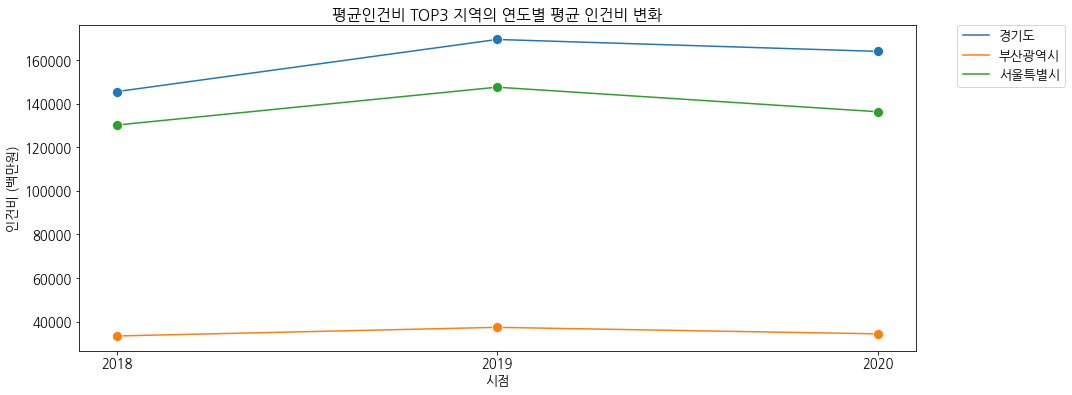

In [ ]:
plt.rc("font",size=13)
plt.figure(figsize=(15, 6))
sns.lineplot(x='시점',y='인건비 (백만원)',hue='시도별',data=df_franchise_region_sales_top3_sales, marker='o',markersize=10,)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('평균인건비 TOP3 지역의 연도별 평균 인건비 변화')
plt.show()

**인사이트**
- 평균인건비는 2018년에서 2019년으로 갈수록 증가했다.
- 그러나 코로나로 인한 경영악화로 2020년에 평균인건비가 감소했다는 것을 볼 수 있다.
- 특히 서울특별시의 경우 코로나 발생이후 인건비가 가장 큰 폭으로 감소했다.

#### 또한 평균인건비 TOP3 지역의 업종별 인건비를 비교해보자.

In [ ]:
df_franchise_top3_labor = df_franchise[df_franchise['시도별'].isin(['서울특별시','부산광역시','경기도'])]

<Figure size 936x936 with 0 Axes>

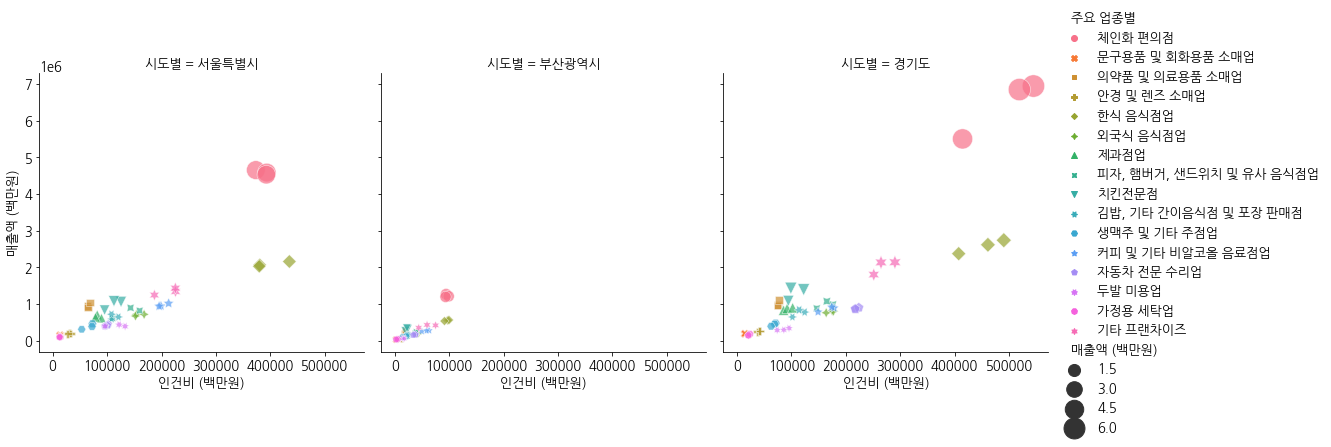

In [ ]:
plt.figure(figsize=(13, 13))
sns.relplot(x = "인건비 (백만원)",y = "매출액 (백만원)",size="매출액 (백만원)", hue="주요 업종별",style="주요 업종별", data= df_franchise_top3_labor,col='시도별',col_wrap=3,alpha=0.7, sizes=(50, 500))
plt.show()

**인사이트**
- 체인화 편의점과 한식 음식점업의 매출액을 비교해보면 체인화 편의점의 경우 한식 음식점업에 비해 같은 인건비로도 더 많은 매출을 발생시킨다는 것을 알 수 있다.

### 2. 어느업종이 가장 매출액이 높을까? (2019년 기준)

- 2019년을 기준으로 매출액의 합계를 비교해보았다.

In [ ]:
df_franchise_2019 = df_franchise[df_franchise['시점']=='2019']

In [ ]:
df_franchise_sales_industry = df_franchise_2019.groupby('주요 업종별')[['매출액 (백만원)']].sum().sort_values(['매출액 (백만원)'],ascending=False)
df_franchise_sales_industry

,매출액 (백만원)
주요 업종별,
체인화 편의점,23198014
한식 음식점업,9455564
기타 프랜차이즈,8109444
치킨전문점,5287802
의약품 및 의료용품 소매업,3858214
커피 및 기타 비알코올 음료점업,3845082
"피자, 햄버거, 샌드위치 및 유사 음식점업",3786657
자동차 전문 수리업,3334834
제과점업,2995384


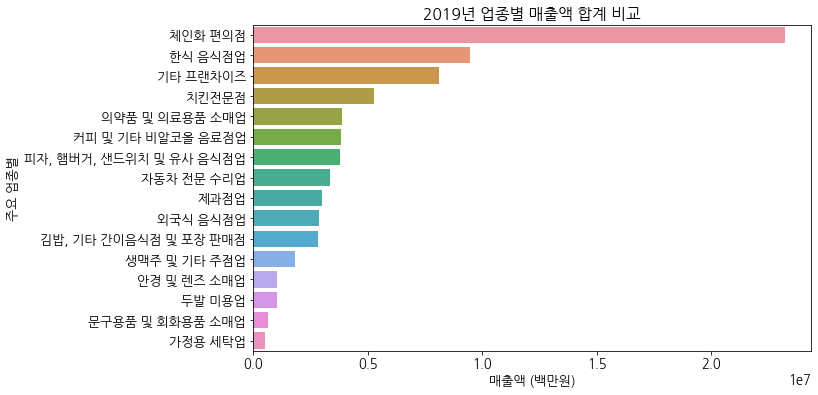

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='매출액 (백만원)', y=	df_franchise_sales_industry.index, data=df_franchise_sales_industry)
plt.title('2019년 업종별 매출액 합계 비교')
plt.show()

**인사이트**
- 체인화편의점, 한식 음식점업, 기타프랜차이즈, 치킨전문점 순으로 매출액의 합계가 높다.
- 특히 체인화편의점의 매출액 합계가 압도적으로 높다.

#### 그렇다면 기타프랜차이즈를 제외한 매출액 합계 TOP3 업종의 지역별 매출액 합계를 보도록 하자

In [ ]:
df_franchise_sectors_list = ['체인화 편의점', '한식 음식점업', '치킨전문점']
df_franchise_sectors = df_franchise[df_franchise['주요 업종별'].isin(df_franchise_sectors_list)]

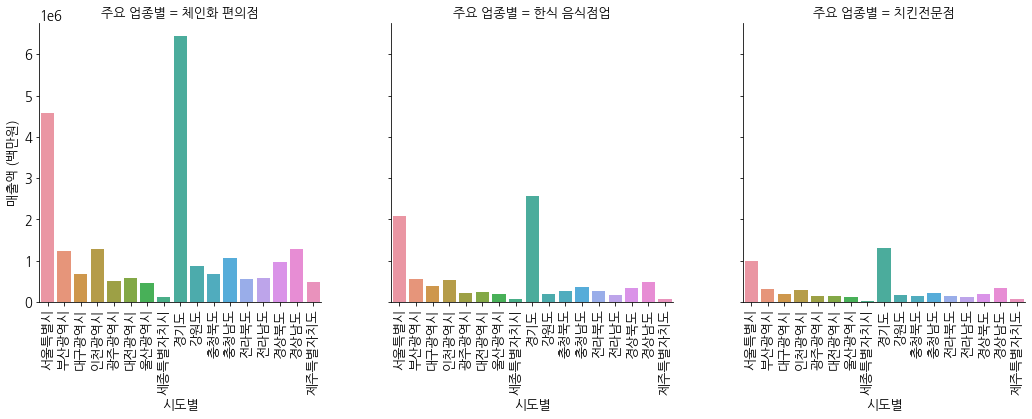

In [ ]:
g = sns.catplot(data=df_franchise_sectors, x="시도별", y="매출액 (백만원)", kind="bar", col="주요 업종별", col_wrap=3,ci=None)
g.set_xticklabels(rotation=90)
plt.show()

**인사이트**
- TOP3 업종에서 매출액 합계가 가장 높은 지역은 경기도이다.
- 특히 매출액 합계가 압도적으로 높은 체인화 편의점의 경우 2위인 서울과 매출액 합계의 차이가 크게 벌어진다.

#### 외식 프랜차이즈의 평균 매출액의 변화를 살펴보자

In [ ]:
list_food = ["한식 음식점업", "커피 및 기타 비알코올 음료점업", "외국식 음식점업", "피자", "햄버거", "샌드위치 및 유사 음식점업",
"김밥, 기타 간이음식점 및 포장 판매점", "치킨전문점", "제과점업", "생맥주 및 기타 주점업"]

df_food = df_franchise[df_franchise["주요 업종별"].isin(list_food)]

df_franchise_group_year_industry =df_food.groupby(["시점","주요 업종별"])[["매출액 (백만원)","사업체수 (개)"]].mean()
df_franchise_group_year_industry

매출액 (백만원)  사업체수 (개)
시점   주요 업종별                                    
2018 김밥, 기타 간이음식점 및 포장 판매점  144545.06    769.24
     생맥주 및 기타 주점업           119305.53    686.82
     외국식 음식점업               161484.35    444.76
     제과점업                   180738.24    432.59
     치킨전문점                  249802.24   1477.06
     커피 및 기타 비알코올 음료점업      200500.35   1036.18
     한식 음식점업                512494.94   1718.18
2019 김밥, 기타 간이음식점 및 포장 판매점  165457.76    786.53
     생맥주 및 기타 주점업           106252.24    586.18
     외국식 음식점업               168160.00    439.76
     제과점업                   176199.06    434.71
     치킨전문점                  311047.18   1511.00
     커피 및 기타 비알코올 음료점업      226181.29   1079.41
     한식 음식점업                556209.65   1819.24
2020 김밥, 기타 간이음식점 및 포장 판매점  178762.18    930.12
     생맥주 및 기타 주점업            89865.29    584.53
     외국식 음식점업               161484.24    488.24
     제과점업                   181122.71    453.00
     치킨전문점                  318907.00   1606.06
     커피 및 기타 비알코올 음료점업      224417.47   1255.41
     한식 음식점업                525857.59   2079.35

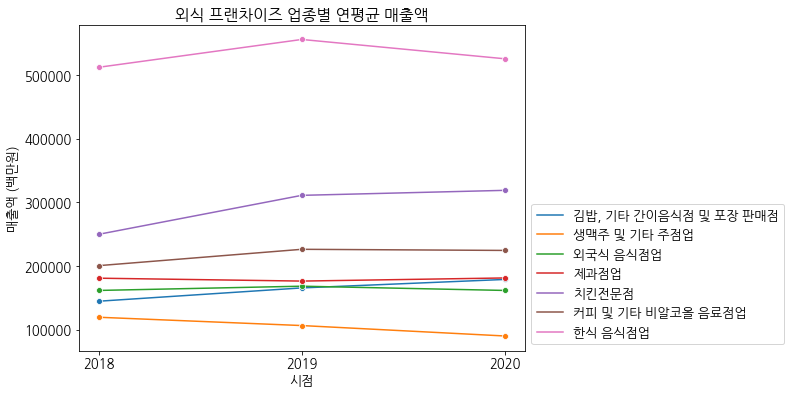

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_franchise_group_year_industry, x="시점", y="매출액 (백만원)", hue="주요 업종별", ci=None, marker='o')
plt.legend(loc=3, ncol=1, bbox_to_anchor=(1,0))
plt.title("외식 프랜차이즈 업종별 연평균 매출액")
plt.show()

**인사이트**
- 외식업 프랜차이즈 중 한식 음식점업의 연평균 매출액이 월등히 높으며, 치킨전문점, 커피 및 기타 비알코올 음료점업이 그 뒤를 따른다.
- 세 업종 모두 연평균 매출액이 2019년 증가했다가 2020년 코로나의 영향으로 감소하는 양상을 보인다.
- 2020년에 김밥, 기타 간이 음식점 및 포장 판매점의 연평균 매출액이 외식 프랜차이즈 업종 중 유일하게 증가하였다. 이는 코로나로 인해 배달 및 포장 문화가 확산됨에 따라 일어난 현상으로 보인다.


### 3. 시도별, 업종별로 프랜차이즈 사업의 전략을 세워보도록 하자.

- 시도별, 업종별로 전체 매출액에서 인건비, 임차료가 차지하는 비율을 계산하여 프랜차이즈 사업전략을 수립해본다.

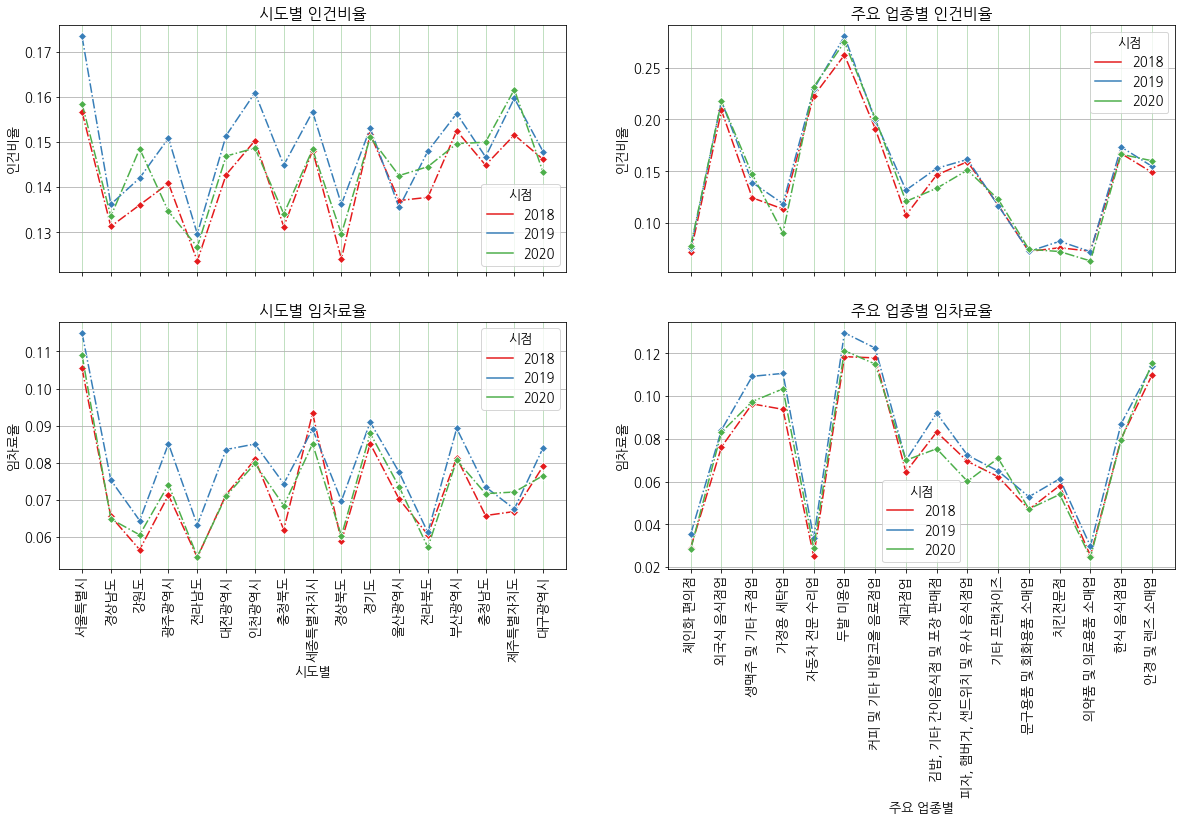

In [ ]:
df_franchise_h = df_franchise.sort_values("시점",ascending=True)

# 지역별 매출규모와 인건비와 인건비율, 임차료와 임차료율을 구해 지역별 원가부담이 작은 곳을 알아본다. 

# 매출금액 대비 인건비율과 임차료율을 구한다.
df_franchise_h["인건비율"] = df_franchise_h["인건비 (백만원)"] / df_franchise_h["매출액 (백만원)"]
df_franchise_h["임차료율"] = df_franchise_h["임차료 (백만원)"] / df_franchise_h["매출액 (백만원)"]


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(20,10), sharex="col" )

ax1.tick_params(axis='x', labelrotation=90, grid_color='g', grid_alpha=0.3)
ax2.tick_params(axis='x', labelrotation=90, grid_color='g', grid_alpha=0.3)
ax3.tick_params(axis='x', labelrotation=90, grid_color='g', grid_alpha=0.3)
ax4.tick_params(axis='x', labelrotation=90, grid_color='g', grid_alpha=0.3)

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

ax1.set_title("시도별 인건비율")
ax2.set_title("주요 업종별 인건비율")
ax3.set_title("시도별 임차료율")
ax4.set_title("주요 업종별 임차료율")

sns.lineplot(data=df_franchise_h, x="시도별", y="인건비율", hue="시점", ci=None, palette="Set1",linestyle = "-.", marker ="D", markersize=6, ax=ax1) #=ax[0])
sns.lineplot(data=df_franchise_h, x="주요 업종별", y="인건비율", hue="시점", ci=None, palette="Set1",linestyle = "-.", marker ="D", markersize=6, ax=ax2) #=ax[0])
sns.lineplot(data=df_franchise_h, x="시도별", y="임차료율", hue="시점", ci=None, palette="Set1",linestyle = "-.", marker ="D", markersize=6, ax=ax3) #=ax[1])
sns.lineplot(data=df_franchise_h, x="주요 업종별", y="임차료율", hue="시점", ci=None, palette="Set1",linestyle = "-.", marker ="D", markersize=6, ax=ax4) #=ax[1])
plt.show()

**인사이트**
- 시도별 인건비율 그래프와 시도별 임차료율 그래프를 보면 타시도에 비해 제주도의 경우 임차료율에 비해 인건비율이 높은편이라 프랜차이즈 무인매장을 오픈하는 것이 유리할 수 있다.
- 주요업종별 인건비율 그래프와 주요업종별 임차료율 그래프를 보면 자동차 전문 수리업의 경우 임차료율에 비해 인건비율이 높은 것을 확인할 수 있으며 반대로 가정용 세탁업의 경우는 임차료율에 비해 인건비율이 높다는 것을 알 수 있다.